In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv("data/silver.csv")
pd.set_option('display.max_columns', None)  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 19 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Invoice                                      824364 non-null  object 
 1   StockCode                                    824364 non-null  object 
 2   Description                                  824364 non-null  object 
 3   Quantity                                     824364 non-null  int64  
 4   InvoiceDate                                  824364 non-null  object 
 5   year                                         824364 non-null  int64  
 6   month                                        824364 non-null  int64  
 7   Price                                        824364 non-null  float64
 8   Customer ID                                  824364 non-null  float64
 9   Country                                      824364 non-nul

In [4]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'year', 'month', 'Price', 'Customer ID', 'Country', 'Total',
       'total_facture', 'Montant', 'nombre_commande_client_années_2009',
       'nombre_commande_client_années_2010',
       'nombre_commande_client_années_2011',
       'nombre_commande_client_années_annulées_2009',
       'nombre_commande_client_années_annulées_2010',
       'nombre_commande_client_années_annulées_2011'],
      dtype='object')


In [5]:
# profile =ProfileReport(df, title = "Profiling Report")
# profile.to_widgets()

In [6]:
Country_uniques = df['Country'].unique()
print(Country_uniques)

['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Nigeria'
 'Malta' 'RSA' 'Singapore' 'Bahrain' 'Thailand' 'Israel' 'Lithuania'
 'West Indies' 'Korea' 'Brazil' 'Canada' 'Iceland' 'Lebanon'
 'Saudi Arabia' 'Czech Republic' 'European Community']


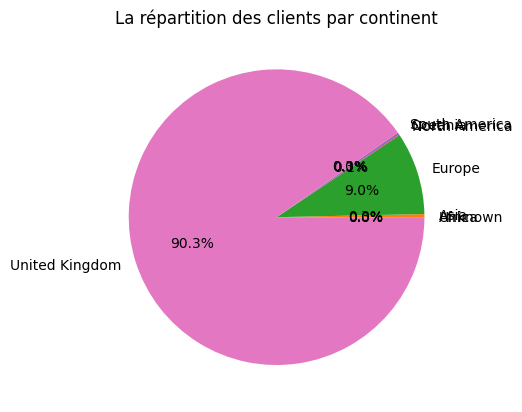

In [7]:
country_to_continent = {
'United Kingdom': 'United Kingdom',
'France': 'Europe',
'USA': 'North America',
'Belgium': 'Europe',
'Australia': 'Oceania',
'EIRE': 'Europe',
'Germany': 'Europe',
'Portugal': 'Europe',
'Japan': 'Asia',
'Denmark': 'Europe',
'Netherlands': 'Europe',
'Poland': 'Europe',
'Spain': 'Europe',
'Channel Islands': 'Europe',
'Italy': 'Europe',
'Cyprus': 'Asia',
'Greece': 'Europe',
'Norway': 'Europe',
'Austria': 'Europe',
'Sweden': 'Europe',
'United Arab Emirates': 'Asia',
'Finland': 'Europe',
'Switzerland': 'Europe',
'Unspecified': 'Unknown',
'Nigeria': 'Africa',
'Malta': 'Europe',
'RSA': 'Africa',
'Singapore': 'Asia',
'Bahrain': 'Asia',
'Thailand': 'Asia',
'Israel': 'Asia',
'Lithuania': 'Europe',
'West Indies': 'North America',
'Korea': 'Asia',
'Brazil': 'South America',
'Canada': 'North America',
'Iceland': 'Europe',
'Lebanon': 'Asia',
'Saudi Arabia': 'Asia',
'Czech Republic': 'Europe',
'European Community': 'Europe'
}

df['Continent'] = df['Country'].map(country_to_continent)

data = df.groupby('Continent')['Invoice'].nunique()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('La répartition des clients par continent')

plt.show()


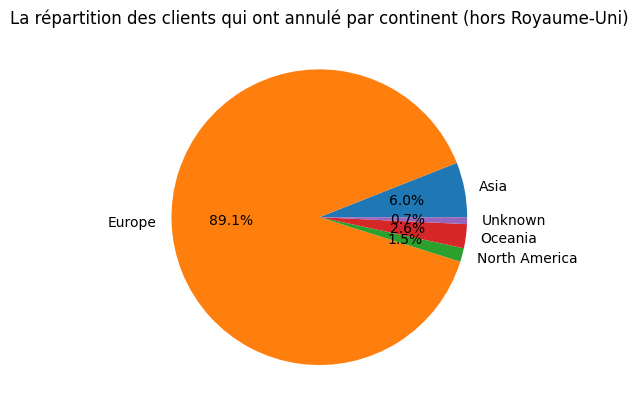

In [8]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Grouper les données par continent et compter le nombre de clients uniques qui ont annulé
data = df_filtered[df_filtered['Invoice'].str.contains('C')].groupby('Continent')['Customer ID'].nunique()

# Créer un graphique circulaire
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('La répartition des clients qui ont annulé par continent (hors Royaume-Uni)')
plt.show()

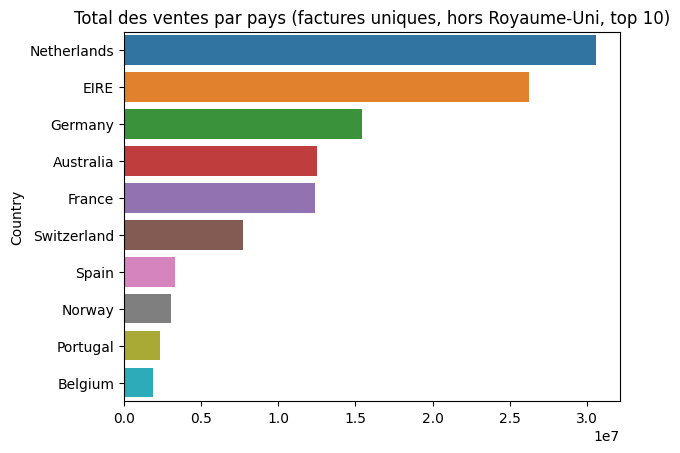

In [9]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df_filtered.drop_duplicates(subset='Customer ID').groupby('Country')['Montant'].sum().sort_values(ascending=False).head(10)

# Créer un graphique à barres
sns.barplot(x=data.values, y=data.index)
plt.title('Total des ventes par pays (factures uniques, hors Royaume-Uni, top 10)')
plt.show()

In [10]:
# Supposons que votre DataFrame s'appelle df
# Filtrer les données pour ne garder que les client uniques
df_unique_invoices = df.drop_duplicates(subset='Customer ID')

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df_unique_invoices.groupby('Country')['Montant'].sum().sort_values(ascending=False)

# Créer un DataFrame à partir des données
table = pd.DataFrame(data)

# Formater les montants avec des séparateurs de milliers
table['Montant'] = table['Montant'].apply(lambda x: '{:,.2f}'.format(x))

# Afficher le tableau
print(table)


                             Montant
Country                             
United Kingdom        443,237,325.88
Netherlands            30,612,324.88
EIRE                   26,280,805.54
Germany                15,419,215.79
Australia              12,506,467.80
France                 12,389,011.90
Switzerland             7,688,357.95
Spain                   3,337,721.11
Norway                  3,041,558.53
Portugal                2,361,481.04
Belgium                 1,866,290.04
Denmark                 1,805,258.41
Sweden                  1,759,292.72
Channel Islands         1,663,222.02
Italy                   1,206,925.17
Cyprus                  1,106,100.14
Greece                  1,075,514.68
Japan                   1,045,546.35
Israel                  1,010,601.60
Finland                   951,444.57
Austria                   900,071.13
Singapore                 741,604.28
United Arab Emirates      472,694.67
Malta                     354,649.03
Unspecified               349,207.78
L

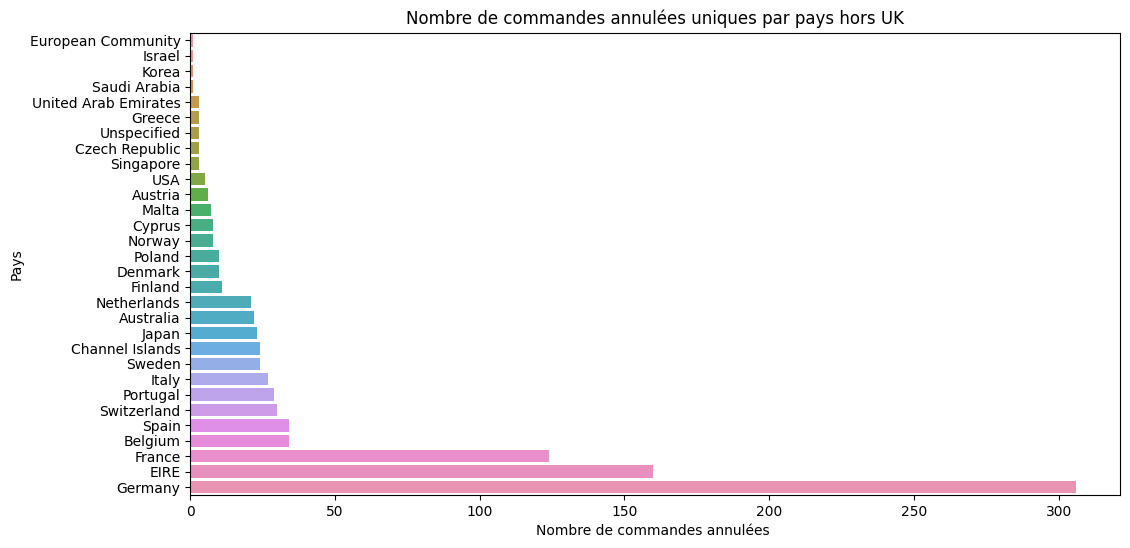

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour inclure uniquement les commandes annulées
cancelled_orders = df[df['Invoice'].str.startswith('C')]

# Filtrer les données pour exclure le Royaume-Uni
cancelled_orders = cancelled_orders[cancelled_orders['Country'] != 'United Kingdom']

# Grouper les données par 'Country' et compter le nombre de commandes annulées uniques pour chaque pays
grouped = cancelled_orders.groupby('Country')['Invoice'].nunique()

# Trier les données en ordre croissant
grouped = grouped.sort_values()

# Créer un DataFrame à partir des données groupées
grouped_df = pd.DataFrame({'Country': grouped.index, 'Cancelled Orders': grouped.values})

# Augmenter la taille de la figure
plt.figure(figsize=(12, 6))

# Créer un graphique à barres horizontales avec Seaborn
sns.barplot(x='Cancelled Orders', y='Country', data=grouped_df)
plt.title('Nombre de commandes annulées uniques par pays hors UK')
plt.xlabel('Nombre de commandes annulées ')
plt.ylabel('Pays')
plt.show()


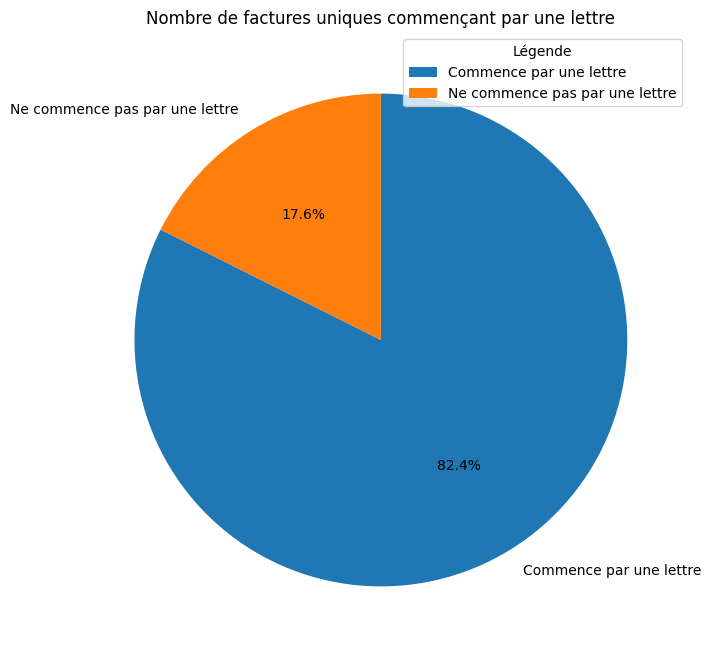

In [12]:
# Créer une nouvelle colonne pour indiquer si la facture commence par une lettre
df['InvoiceStartsWithLetter'] = df['Invoice'].str[0].str.isalpha()

# Compter le nombre de factures uniques qui commencent par une lettre et celles qui ne le font pas
invoice_counts = df.drop_duplicates(subset='Invoice')['InvoiceStartsWithLetter'].value_counts()

# Créer un graphique circulaire
plt.figure(figsize=(12, 8))

plt.pie(invoice_counts, labels=['Commence par une lettre', 'Ne commence pas par une lettre'], startangle=90, counterclock=False, autopct='%1.1f%%')
plt.title('Nombre de factures uniques commençant par une lettre')
plt.legend(title='Légende')
plt.show()

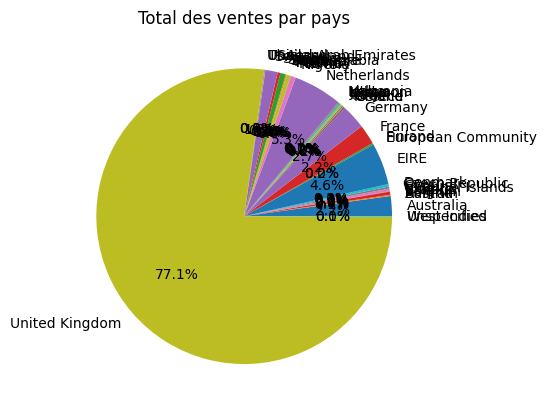

In [13]:
data = df.groupby('Country')['total_facture'].sum()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par pays')
plt.show()


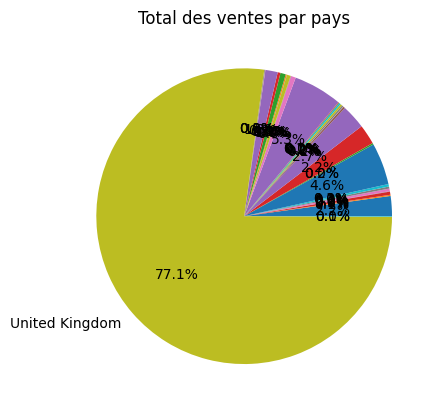

In [14]:
data = df.groupby('Country')['total_facture'].sum()
total = data.sum()
labels = [label if value / total > 0.1 else '' for label, value in data.items()]
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Total des ventes par pays')
plt.show()


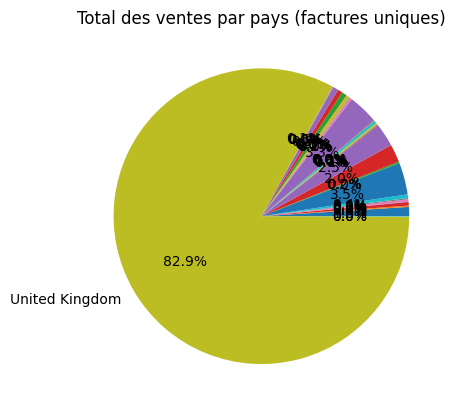

In [15]:

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df.drop_duplicates(subset='Invoice').groupby('Country')['total_facture'].sum()
total = data.sum()

# Créer des étiquettes pour les pays dont la part est supérieure à 10%
labels = [label if value / total > 0.1 else '' for label, value in data.items()]

# Créer un graphique circulaire
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Total des ventes par pays (factures uniques)')
plt.show()


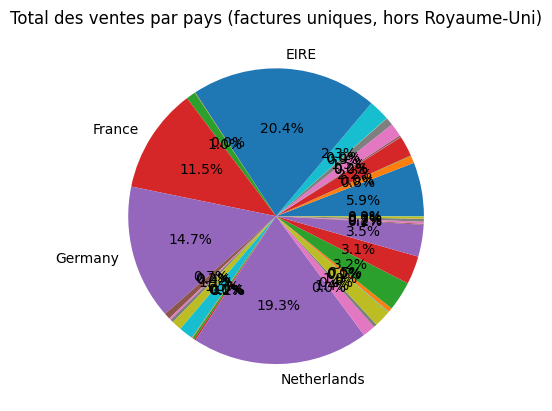

In [16]:

# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df_filtered.drop_duplicates(subset='Invoice').groupby('Country')['total_facture'].sum()
total = data.sum()

# Créer des étiquettes pour les pays dont la part est supérieure à 10%
labels = [label if value / total > 0.1 else '' for label, value in data.items()]

# Créer un graphique circulaire
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Total des ventes par pays (factures uniques, hors Royaume-Uni)')
plt.show()


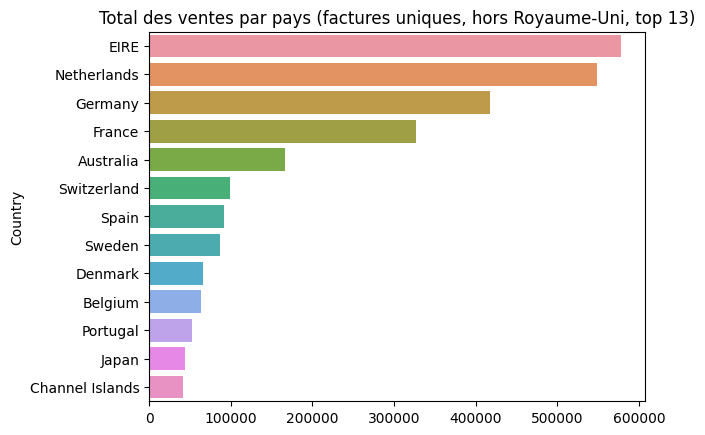

In [17]:

# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df_filtered.drop_duplicates(subset='Invoice').groupby('Country')['total_facture'].sum().sort_values(ascending=False).head(13)

# Créer un graphique à barres
sns.barplot(x=data.values, y=data.index)
plt.title('Total des ventes par pays (factures uniques, hors Royaume-Uni, top 13)')
plt.show()



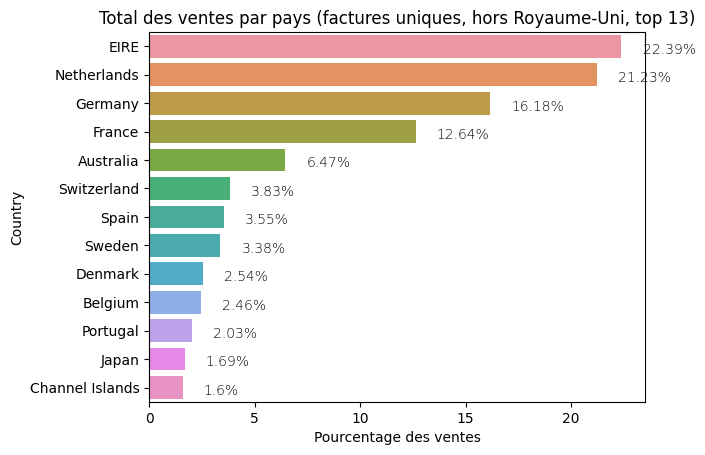

In [64]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df_filtered.drop_duplicates(subset='Invoice').groupby('Country')['total_facture'].sum().sort_values(ascending=False).head(13)

# Calculer le total des montants
total = data.sum()

# Convertir les montants en pourcentage
data_percentage = data.apply(lambda x: x / total * 100)

# Créer un graphique à barres
ax = sns.barplot(x=data_percentage.values, y=data_percentage.index)
plt.title('Total des ventes par pays (factures uniques, hors Royaume-Uni, top 13)')
plt.xlabel('Pourcentage des ventes')

# Afficher les valeurs à côté des barres
for i, v in enumerate(data_percentage.values):
    ax.text(v + 1, i + .25, str(round(v, 2)) + '%', color='black', fontweight='light')

plt.show()

In [18]:
# # Grouper les données par 'Country' et calculer la somme de 'Montant' pour chaque groupe
# data = df.groupby('Country')['Montant'].sum()

# # Créer un DataFrame à partir des données groupées
# data_df = pd.DataFrame({'Country': data.index, 'Total Sales': data.values})

# # Augmenter la taille de la figure
# plt.figure(figsize=(12, 6))

# # Créer un graphique à barres avec Seaborn
# sns.barplot(x='Country', y='Total Sales', data=data_df)
# plt.title('Total des ventes par pays')
# plt.xlabel('Pays')
# plt.ylabel('Total des ventes')
# plt.xticks(rotation=90)
# plt.show()

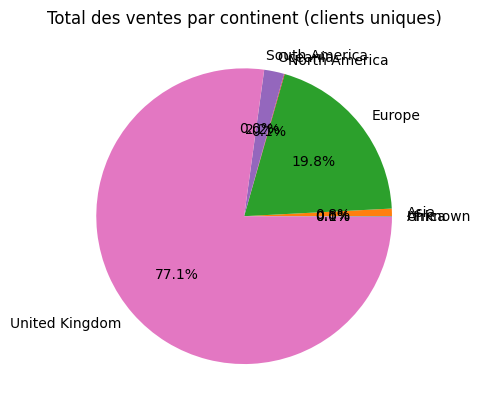

In [19]:
country_to_continent = {
'United Kingdom': 'United Kingdom',
'France': 'Europe',
'USA': 'North America',
'Belgium': 'Europe',
'Australia': 'Oceania',
'EIRE': 'Europe',
'Germany': 'Europe',
'Portugal': 'Europe',
'Japan': 'Asia',
'Denmark': 'Europe',
'Netherlands': 'Europe',
'Poland': 'Europe',
'Spain': 'Europe',
'Channel Islands': 'Europe',
'Italy': 'Europe',
'Cyprus': 'Asia',
'Greece': 'Europe',
'Norway': 'Europe',
'Austria': 'Europe',
'Sweden': 'Europe',
'United Arab Emirates': 'Asia',
'Finland': 'Europe',
'Switzerland': 'Europe',
'Unspecified': 'Unknown',
'Nigeria': 'Africa',
'Malta': 'Europe',
'RSA': 'Africa',
'Singapore': 'Asia',
'Bahrain': 'Asia',
'Thailand': 'Asia',
'Israel': 'Asia',
'Lithuania': 'Europe',
'West Indies': 'North America',
'Korea': 'Asia',
'Brazil': 'South America',
'Canada': 'North America',
'Iceland': 'Europe',
'Lebanon': 'Asia',
'Saudi Arabia': 'Asia',
'Czech Republic': 'Europe',
'European Community': 'Europe'
}

# Filtrer les données pour ne garder que les clients uniques
df_unique_customers = df.drop_duplicates(subset='Customer ID')

# Grouper les données par continent et calculer la somme des montants pour les clients uniques
data = df_unique_customers.groupby('Continent')['Montant'].sum()

# Créer un graphique circulaire
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par continent (clients uniques)')
plt.show()


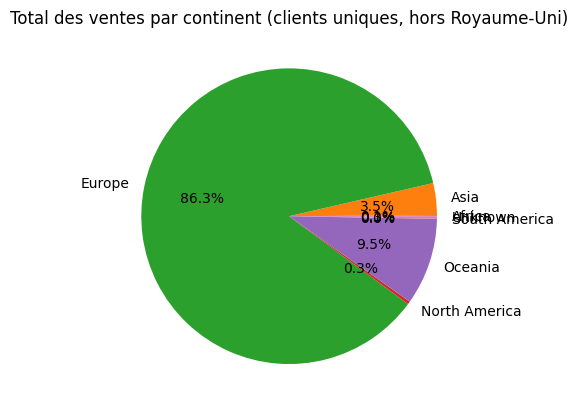

In [20]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Filtrer les données pour ne garder que les clients uniques
df_unique_customers = df_filtered.drop_duplicates(subset='Customer ID')

# Grouper les données par continent et calculer la somme des montants pour les clients uniques
data = df_unique_customers.groupby('Continent')['Montant'].sum()

# Créer un graphique circulaire
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par continent (clients uniques, hors Royaume-Uni)')
plt.show()

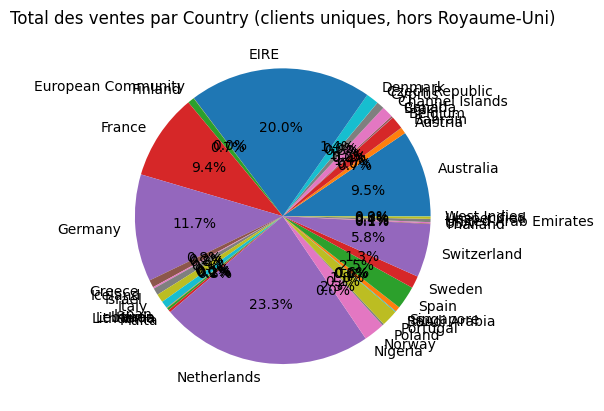

In [21]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Filtrer les données pour ne garder que les clients uniques
df_unique_customers = df_filtered.drop_duplicates(subset='Customer ID')

# Grouper les données par continent et calculer la somme des montants pour les clients uniques
data = df_unique_customers.groupby('Country')['Montant'].sum()

# Créer un graphique circulaire
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par Country (clients uniques, hors Royaume-Uni)')
plt.show()

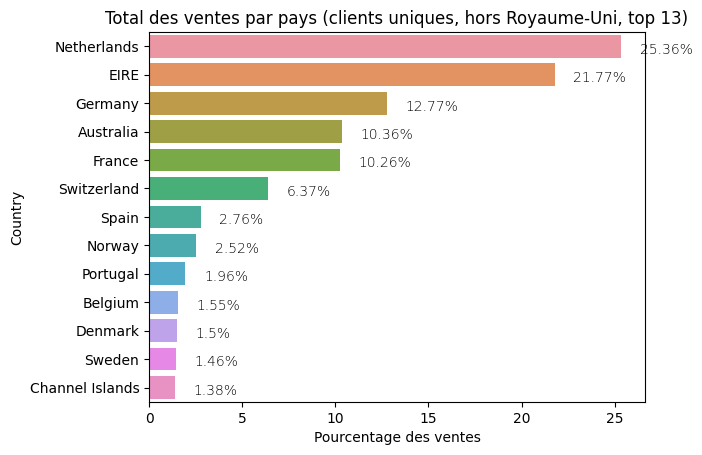

In [63]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Filtrer les données pour ne garder que les clients uniques
df_unique_customers = df_filtered.drop_duplicates(subset='Customer ID')

# Grouper les données par pays et calculer la somme des montants pour les clients uniques
data = df_unique_customers.groupby('Country')['Montant'].sum().sort_values(ascending=False).head(13)

# Calculer le total des montants
total = data.sum()

# Convertir les montants en pourcentage
data_percentage = data.apply(lambda x: x / total * 100)

# Créer un graphique à barres

ax = sns.barplot(x=data_percentage.values, y=data_percentage.index)
plt.title('Total des ventes par pays (clients uniques, hors Royaume-Uni, top 13)')
plt.xlabel('Pourcentage des ventes')

# Afficher les valeurs à côté des barres
for i, v in enumerate(data_percentage.values):
    ax.text(v + 1, i + .25, str(round(v, 2)) + '%', color='black', fontweight='light')

plt.show()

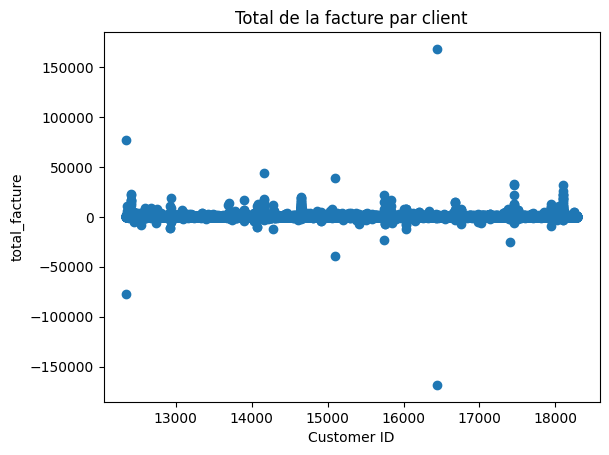

In [22]:
# Créez un masque pour supprimer les doublons de 'Invoice'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['total_facture'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total de la facture par client') # Ajout d'un titre

plt.show()

In [23]:
# df[df['total_facture']  >40000]


In [24]:
# df[df['total_facture'] < -20000]


In [25]:
# df_client = df.loc[df['Customer ID'] == 12346.0    ]       
# df_client
# 15098.0	
# C556445	
# 556444

#####
# 12346.0	
# 541431
# C541433	

#####
# 16446.0
# 581483
# C581484

#####  '540815','540818','C550456'


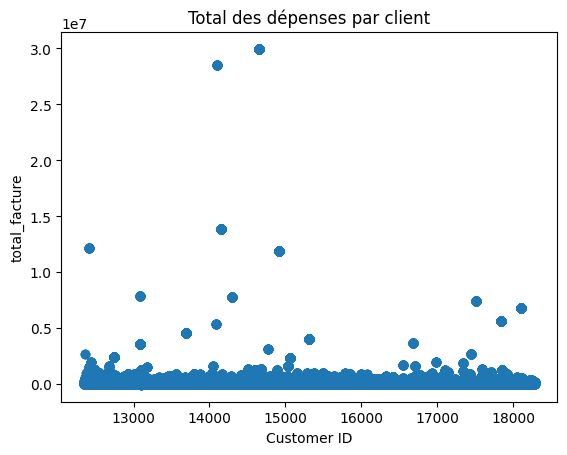

In [26]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['Montant'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total des dépenses par client') # Ajout d'un titre

plt.show()

In [27]:
mask = ~df.duplicated(subset='Customer ID') & (df['Montant'] > 3000000)
df_filtered = df[mask].sort_values(by='Montant', ascending=False)

df_filtered 
# 29 957 131.19

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,InvoiceStartsWithLetter
4547,489889,22271,FELTCRAFT DOLL ROSIE,96,2009-12-02,2009,12,2.55,14646.0,Netherlands,244.80,4734.24,29957131.19,5.0,84.0,75.0,0.0,9.0,3.0,Europe,False
648440,564764,16207B,PINK HEART RED HANDBAG,1,2011-08-30,2011,8,2.46,14096.0,United Kingdom,2.46,21.84,28532583.09,0.0,0.0,34.0,0.0,0.0,17.0,United Kingdom,False
994,489546,84050,PINK HEART SHAPE EGG FRYING PAN,6,2009-12-01,2009,12,1.65,14156.0,EIRE,9.90,584.50,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,Europe,False
199042,513987,21917,SET 12 KIDS WHITE CHALK STICKS,24,2010-06-30,2010,6,0.42,12415.0,Australia,10.08,2326.74,12129731.00,0.0,7.0,26.0,0.0,0.0,5.0,Oceania,False
437,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01,2009,12,0.75,14911.0,EIRE,9.00,733.63,11931038.60,16.0,262.0,232.0,7.0,61.0,44.0,Europe,False
14032,490937,22273,FELTCRAFT DOLL MOLLY,24,2009-12-08,2009,12,2.95,13081.0,United Kingdom,70.80,2285.58,7890866.30,1.0,24.0,19.0,0.0,6.0,10.0,United Kingdom,False
19356,491612,16168S,FUNKY MONKEY GIFT BAG SMALL,216,2009-12-11,2009,12,0.09,14298.0,United Kingdom,19.44,849.94,7788613.81,2.0,42.0,40.0,0.0,1.0,1.0,United Kingdom,False
2595,489702,22086,PAPER CHAIN KIT 50'S CHRISTMAS,280,2009-12-02,2009,12,2.55,17511.0,United Kingdom,714.00,3108.64,7427754.43,2.0,41.0,42.0,0.0,11.0,14.0,United Kingdom,False
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01,2009,12,0.98,18102.0,United Kingdom,27.44,2286.24,6778621.37,9.0,86.0,58.0,0.0,6.0,2.0,United Kingdom,False
4272,489875,79160,HEART SHAPE WIRELESS DOORBELL,11,2009-12-02,2009,12,2.10,17841.0,United Kingdom,23.10,530.76,5681697.88,9.0,119.0,161.0,1.0,34.0,43.0,United Kingdom,False


In [28]:
to_remove = ['C556445', '556444', '541431', 'C541433', '581483', 'C581484', 'C512770','540815','540818','C550456']  #  attention C512770 c'est 1 seul ligne manual
df = df[~df['Invoice'].isin(to_remove)]


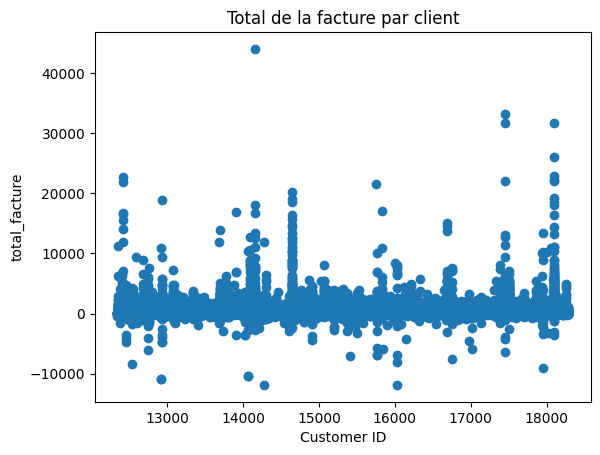

In [29]:
# Créez un masque pour supprimer les doublons de 'Invoice'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['total_facture'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total de la facture par client') # Ajout d'un titre

plt.show()

pour ne conserver que les lignes où la valeur de la colonne ‘total_client_années’ est inférieure ou égale à 5000000. 

In [30]:
# df = df[df['total_client_années'] <= 5000000]


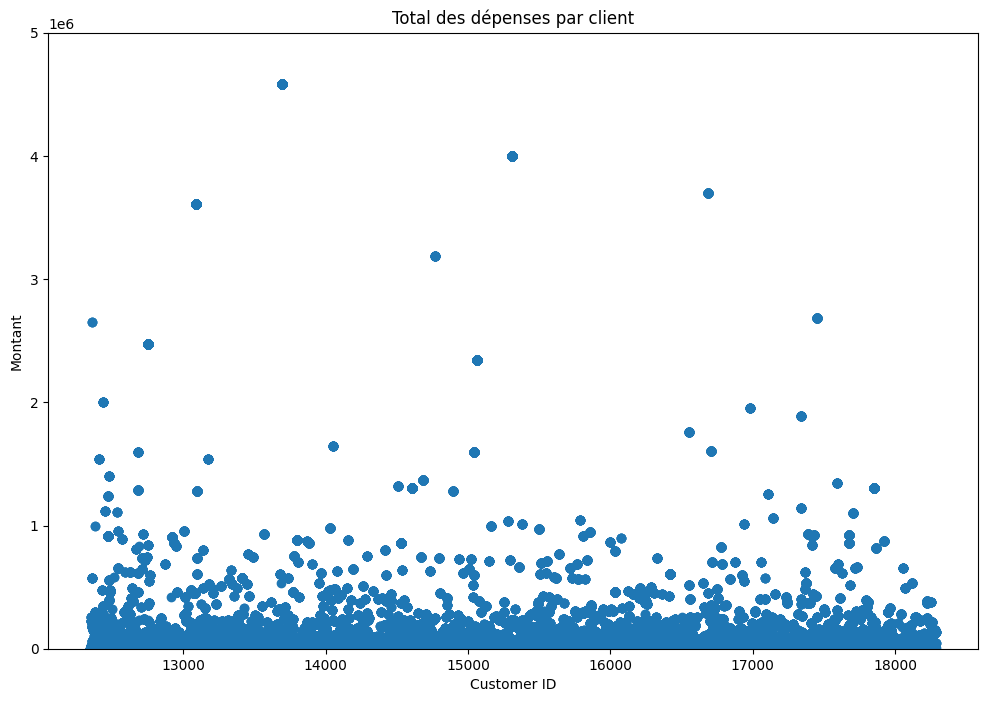

In [31]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.figure(figsize=(12, 8))

plt.scatter(df_filtered['Customer ID'], df_filtered['Montant'])

plt.xlabel('Customer ID')
plt.ylabel('Montant')
plt.title('Total des dépenses par client') # Ajout d'un titre

# Effectuez un zoom sur la partie supérieure droite du graphique
plt.ylim(0, 5000000)


plt.show()

In [32]:
# # Créez un masque pour supprimer les doublons de 'Customer ID'
# mask = df.duplicated(subset=['Customer ID'], keep='first')
# df_filtered = df[~mask]

# # Calculez le nombre de tranches
# max_value = df_filtered['Montant'].max()
# n_bins = int(max_value / 100) + 1

# # Calculez les limites des tranches
# bin_edges = np.arange(0, n_bins * 500, 500)

# # Calculez le nombre de 'Customer ID' uniques par tranche
# df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)
# n_unique_per_bin = df_filtered.groupby('bin')['Customer ID'].nunique()

# # Créez le bar plot
# plt.figure(figsize=(12, 8))
# n_unique_per_bin.plot(kind='bar')
# plt.xlabel('Montant')
# plt.ylabel('Nombre de Customer ID uniques')
# plt.title('Nombre de Customer ID uniques par tranche de total_client_années')

# plt.show()



C:\Users\impej\AppData\Local\Temp\ipykernel_2300\537746103.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)


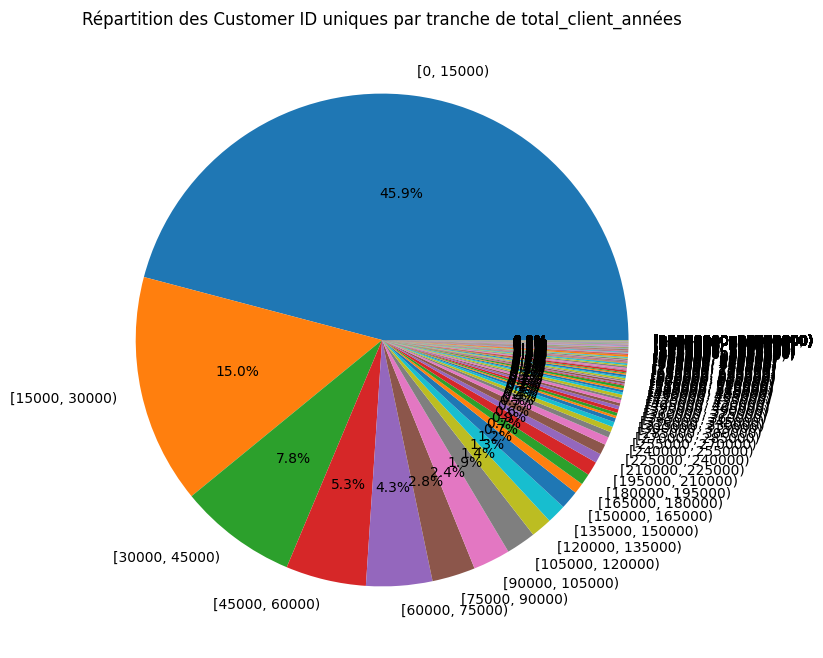

In [33]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Calculez le nombre de tranches
max_value = df_filtered['Montant'].max()
n_bins = int(max_value / 15000) + 1

# Calculez les limites des tranches
bin_edges = np.arange(0, n_bins * 15000, 15000)

# Calculez le nombre de 'Customer ID' uniques par tranche
df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)
n_unique_per_bin = df_filtered.groupby('bin')['Customer ID'].nunique()

# Calculez les pourcentages
percentages = n_unique_per_bin / n_unique_per_bin.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des Customer ID uniques par tranche de total_client_années')

plt.show()


C:\Users\impej\AppData\Local\Temp\ipykernel_2300\224287086.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)


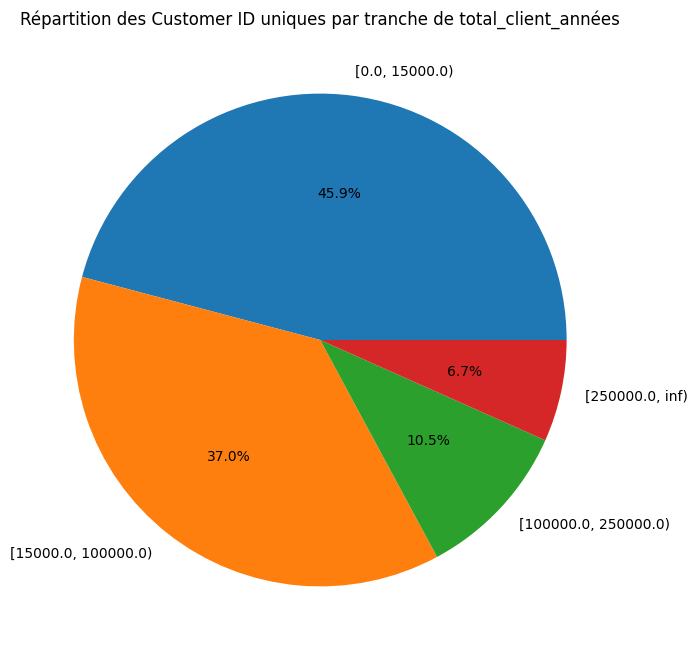

In [34]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Définissez les limites des tranches
bin_edges = [0, 15000, 100000, 250000, np.inf]

# Calculez le nombre de 'Customer ID' uniques par tranche
df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)
n_unique_per_bin = df_filtered.groupby('bin')['Customer ID'].nunique()

# Calculez les pourcentages
percentages = n_unique_per_bin / n_unique_per_bin.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des Customer ID uniques par tranche de total_client_années')

plt.show()


In [35]:
df[df['StockCode'].astype(str).str.startswith('T')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,InvoiceStartsWithLetter
21779,491725,TEST001,This is a test product.,10,2009-12-14,2009,12,4.5,12346.0,United Kingdom,45.0,45.0,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom,False
22035,491742,TEST001,This is a test product.,5,2009-12-14,2009,12,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom,False
22038,491744,TEST001,This is a test product.,5,2009-12-14,2009,12,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom,False
28943,492718,TEST001,This is a test product.,5,2009-12-18,2009,12,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom,False
28955,492722,TEST002,This is a test product.,1,2009-12-18,2009,12,1.0,12346.0,United Kingdom,1.0,1.0,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom,False
31760,493410,TEST001,This is a test product.,5,2010-01-04,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom,False
31762,493412,TEST001,This is a test product.,5,2010-01-04,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom,False
38451,494450,TEST001,This is a test product.,5,2010-01-14,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom,False
45590,495295,TEST001,This is a test product.,5,2010-01-22,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom,False
63878,497819,TEST001,This is a test product.,5,2010-02-12,2010,2,0.0,14103.0,United Kingdom,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,United Kingdom,False


In [36]:
# df = df[~df['StockCode'].astype(str).str.startswith('T')]


In [37]:
# # Définissez les limites des tranches
# bin_edges = [0, 15000, 100000, 250000, np.inf]

# # Créez la colonne 'niveau_achat'
# df['niveau_achat'] = pd.cut(df['total_client_années'], bins=bin_edges, right=False)

# Définissez les limites des tranches
bin_edges = [0, 15000, 100000, 250000, np.inf]

# Définissez les labels pour les tranches
bin_labels = [1, 2, 3, 4]

# Créez la colonne 'niveau_achat'
df['niveau_achat'] = pd.cut(df['Montant'], bins=bin_edges, labels=bin_labels, right=False)


In [38]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,InvoiceStartsWithLetter,niveau_achat
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1


## R de rfm   récence

In [39]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['LastInvoiceDate'] = df.groupby('Customer ID')['InvoiceDate'].transform('max')
df['Recency'] = df['InvoiceDate'].max() - df['LastInvoiceDate']
df['Recency'] = df['Recency'].dt.days
df = df.drop(columns=['LastInvoiceDate'])


In [40]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,InvoiceStartsWithLetter,niveau_achat,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0


##  Créer la colonne "Frequency"


In [41]:
df['Frequency'] = df['nombre_commande_client_années_2009'] + df['nombre_commande_client_années_2010'] + df['nombre_commande_client_années_2011']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,InvoiceStartsWithLetter,niveau_achat,Recency,Frequency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0


In [42]:
df['Frequency_reel'] = df['nombre_commande_client_années_2009'] + df['nombre_commande_client_années_2010'] + df['nombre_commande_client_années_2011'] - df['nombre_commande_client_années_annulées_2009'] - df['nombre_commande_client_années_annulées_2010'] - df['nombre_commande_client_années_annulées_2011']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,InvoiceStartsWithLetter,niveau_achat,Recency,Frequency,Frequency_reel
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0


In [43]:
unique_invoices = df[df['Customer ID'] == 12680.0]['Invoice'].nunique()
print(f'Le client avec l\'ID 13085.0 a {unique_invoices} factures uniques.')


Le client avec l'ID 13085.0 a 4 factures uniques.


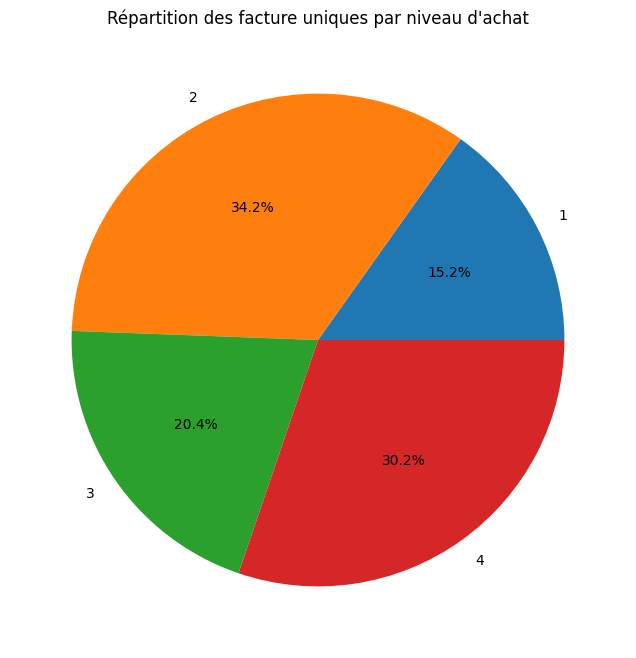

In [44]:
# Créez un masque pour supprimer les doublons de 'Invoice'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Calculez le nombre d' 'Invoice' uniques par niveau d'achat
n_unique_per_level = df_filtered.groupby('niveau_achat')['Invoice'].nunique()

# Calculez les pourcentages
percentages = n_unique_per_level / n_unique_per_level.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des facture uniques par niveau d\'achat')

plt.show()


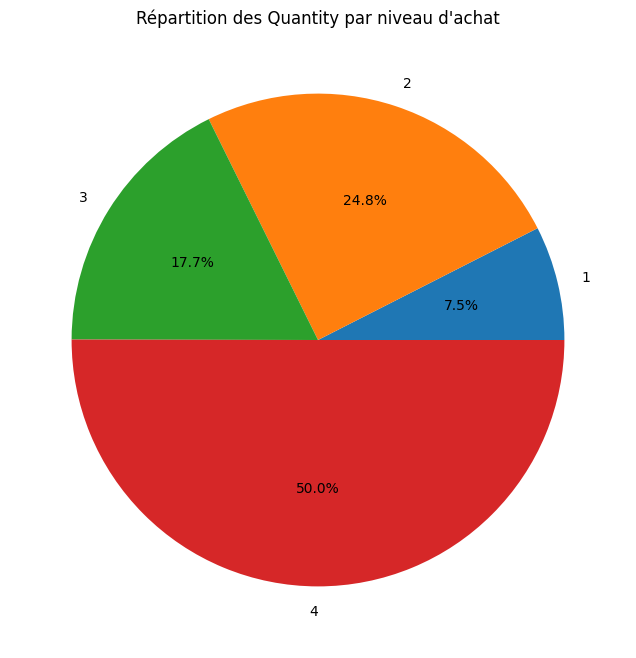

In [45]:
# Calculez la somme des valeurs de 'Quantity' par niveau d'achat
quantity_per_level = df.groupby('niveau_achat')['Quantity'].sum()

# Calculez les pourcentages
percentages = quantity_per_level / quantity_per_level.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des Quantity par niveau d\'achat')

plt.show()


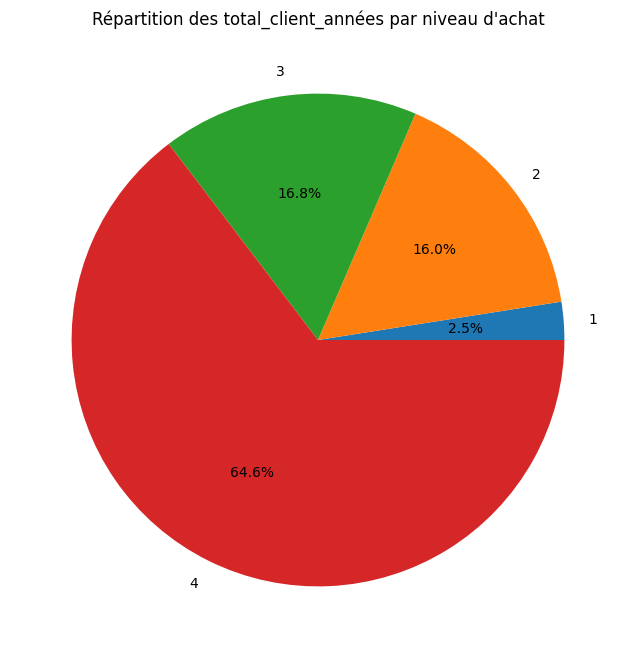

In [46]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Calculez la somme des valeurs de 'total_client_années' par niveau d'achat
total_per_level = df_filtered.groupby('niveau_achat')['Montant'].sum()

# Calculez les pourcentages
percentages = total_per_level / total_per_level.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des total_client_années par niveau d\'achat')

plt.show()


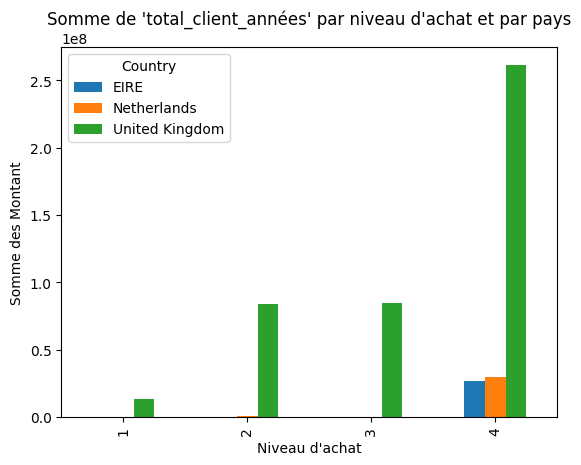

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Filtrer les données pour inclure uniquement les pays spécifiés
df_filtered = df_filtered[df_filtered['Country'].isin(['EIRE', 'Netherlands', 'United Kingdom'])]

# Grouper les données par 'niveau_achat' et 'Country'
grouped = df_filtered.groupby(['niveau_achat', 'Country'])['Montant'].sum().unstack()

# Créer un graphique à barres
grouped.plot(kind='bar')
plt.title('Somme de \'total_client_années\' par niveau d\'achat et par pays')
plt.xlabel('Niveau d\'achat')
plt.ylabel('Somme des Montant')
plt.show()


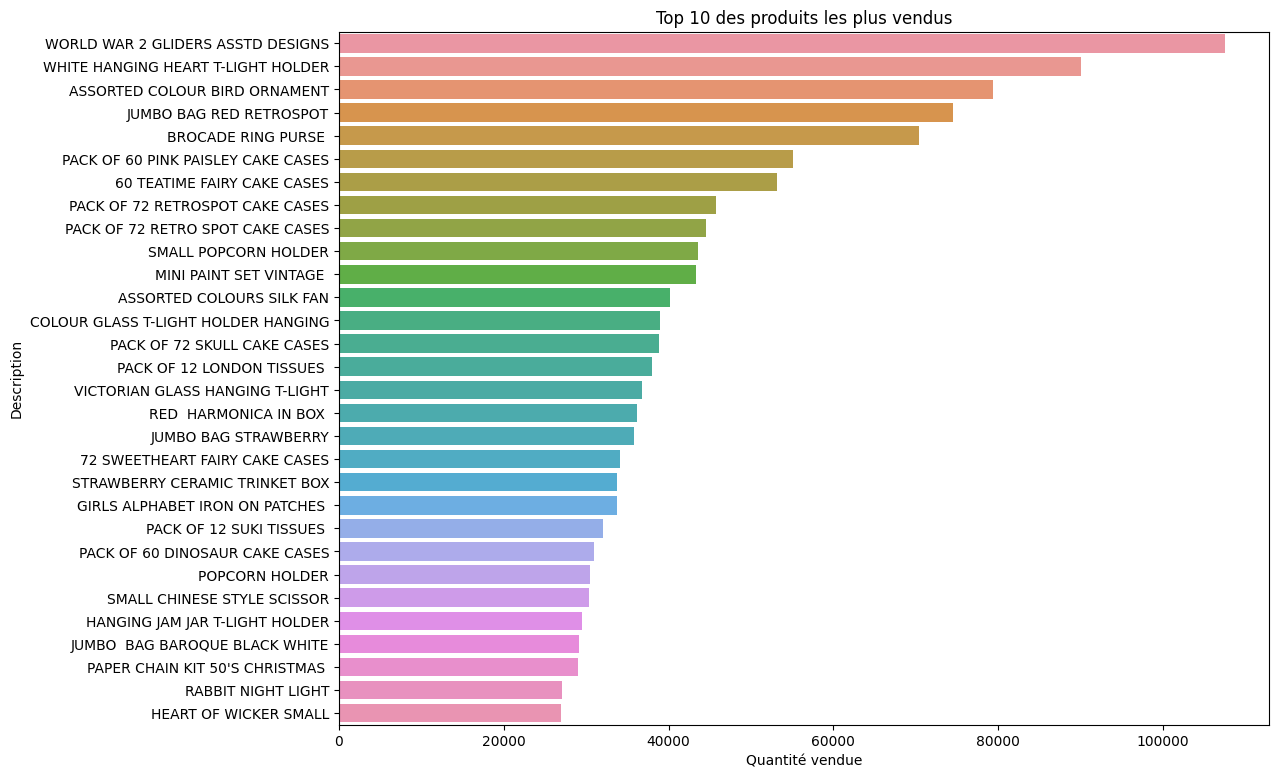

In [48]:


# Grouper les données par 'Description' et calculer la somme de 'Quantity' pour chaque groupe
grouped = df.groupby('Description')['Quantity'].sum()

# Trier les données en ordre décroissant et sélectionner les 10 premières lignes
top_10 = grouped.sort_values(ascending=False).head(30)

# Créer un DataFrame à partir des données de top_10
top_10_df = pd.DataFrame({'Description': top_10.index, 'Quantity': top_10.values})

# Augmenter la taille de la figure
plt.figure(figsize=(12, 9))


# Créer un graphique à barres horizontales avec Seaborn
sns.barplot(x='Quantity', y='Description', data=top_10_df)
plt.title('Top 10 des produits les plus vendus')
plt.xlabel('Quantité vendue')
plt.ylabel('Description')
plt.show()


In [49]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,InvoiceStartsWithLetter,niveau_achat,Recency,Frequency,Frequency_reel
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0


In [50]:
df = df.drop('Description', axis=1)
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,InvoiceStartsWithLetter,niveau_achat,Recency,Frequency,Frequency_reel
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,False,2,157,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824360,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824361,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824362,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0


In [51]:
df = df.reindex(columns=['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'year', 'month',
       'Price', 'Customer ID', 'Country', 'Total', 'total_facture',
       'nombre_commande_client_années_2009',
       'nombre_commande_client_années_2010',
       'nombre_commande_client_années_2011',
       'nombre_commande_client_années_annulées_2009',
       'nombre_commande_client_années_annulées_2010',
       'nombre_commande_client_années_annulées_2011', 'Continent',
       'niveau_achat', 'Recency', 'Frequency', 'Frequency_reel', 'Montant'])
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,niveau_achat,Recency,Frequency,Frequency_reel,Montant
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0,27639.60
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0,27639.60
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0,27639.60
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0,27639.60
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0,27639.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0,13193.46
824360,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0,13193.46
824361,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0,13193.46
824362,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0,13193.46


### création du nouveau CSV

In [52]:
df.to_csv("data/gold.csv" , index=False)   

In [53]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'year', 'month',
       'Price', 'Customer ID', 'Country', 'Total', 'total_facture',
       'nombre_commande_client_années_2009',
       'nombre_commande_client_années_2010',
       'nombre_commande_client_années_2011',
       'nombre_commande_client_années_annulées_2009',
       'nombre_commande_client_années_annulées_2010',
       'nombre_commande_client_années_annulées_2011', 'Continent',
       'niveau_achat', 'Recency', 'Frequency', 'Frequency_reel', 'Montant'],
      dtype='object')
